In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [83]:
# read data
train_df = pd.read_csv('MELD.Raw/train/train_sent_emo.csv')

In [84]:
# set encoders
emotion_encoder = LabelEncoder()
sentiment_encoder = LabelEncoder()
emotion_encoder.fit(train_df['Emotion'])
sentiment_encoder.fit(train_df['Sentiment'])

LabelEncoder()

In [85]:
emotion_distribution = train_df['Emotion'].value_counts(normalize=True)
emotion_distribution

Emotion
neutral     0.471519
joy         0.174492
surprise    0.120633
anger       0.111022
sadness     0.068375
disgust     0.027130
fear        0.026830
Name: proportion, dtype: float64

In [86]:
sentiment_distribution = train_df['Sentiment'].value_counts(normalize=True)
sentiment_distribution

Sentiment
neutral     0.471519
negative    0.294824
positive    0.233657
Name: proportion, dtype: float64

In [87]:
train_df['word_count'] = train_df['Utterance'].apply(lambda x: len(x.split()))

In [88]:
train_df.groupby('Emotion')['word_count'].mean()


Emotion
anger       9.149684
disgust     9.948339
fear        9.085821
joy         7.745267
neutral     7.785563
sadness     9.948755
surprise    6.016598
Name: word_count, dtype: float64

In [89]:
top_10_speakers = train_df.groupby('Speaker', as_index=False)['Speaker'].size()
top_10_speakers = top_10_speakers.sort_values(by='size', ascending=False)
top_10_speakers = top_10_speakers['Speaker'].values[0:10]

In [90]:
top_10_speakers

array(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler', 'Janice',
       'Carol', 'Emily', 'Tag'], dtype=object)

In [91]:
train_df_top_10 = train_df[train_df['Speaker'].isin(top_10_speakers)]

In [92]:
train_df_top_10.groupby('Speaker',)['word_count'].mean()

Speaker
Carol        8.673913
Chandler     8.243959
Emily        9.395349
Janice      10.603448
Joey         7.838304
Monica       7.887606
Phoebe       8.043149
Rachel       7.859930
Ross         7.980809
Tag          6.146341
Name: word_count, dtype: float64

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Function to generate and display word clouds
def generate_word_clouds(df, column):
    # Unique categories
    categories = df[column].unique()
    
    # Figure setup
    plt.figure(figsize=(20, 10))
    
    # Generate a word cloud for each category
    for i, category in enumerate(categories, 1):
        # Aggregate text for the current category
        text = " ".join(df[df[column] == category]['Utterance'].tolist())
        
        # Generate word cloud
        wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)
        
        # Plot
        plt.subplot(1, len(categories), i)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'{category} {column}')
        plt.axis('off')
    
    plt.show()


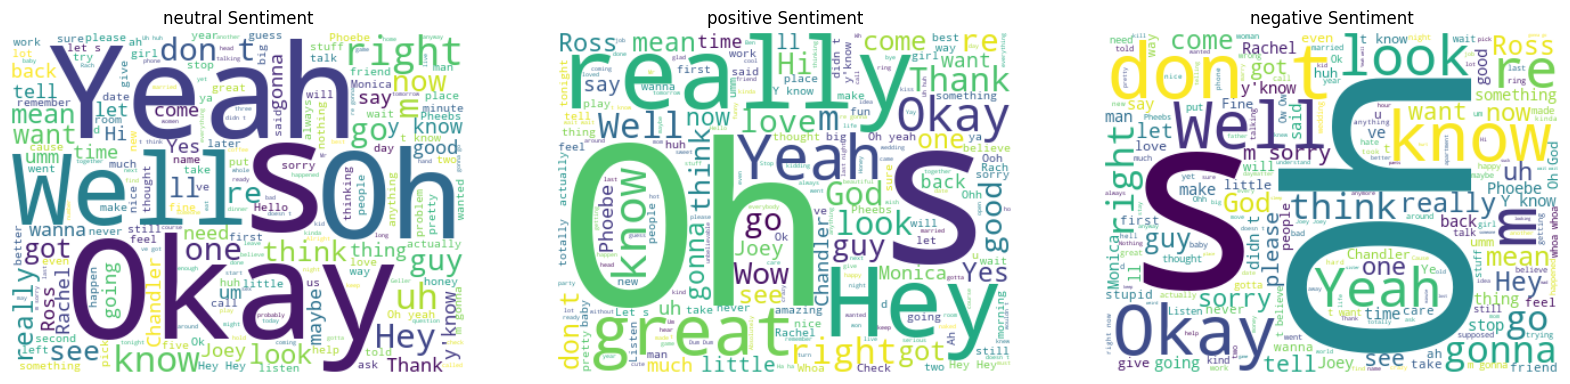

In [94]:
generate_word_clouds(train_df, 'Sentiment')

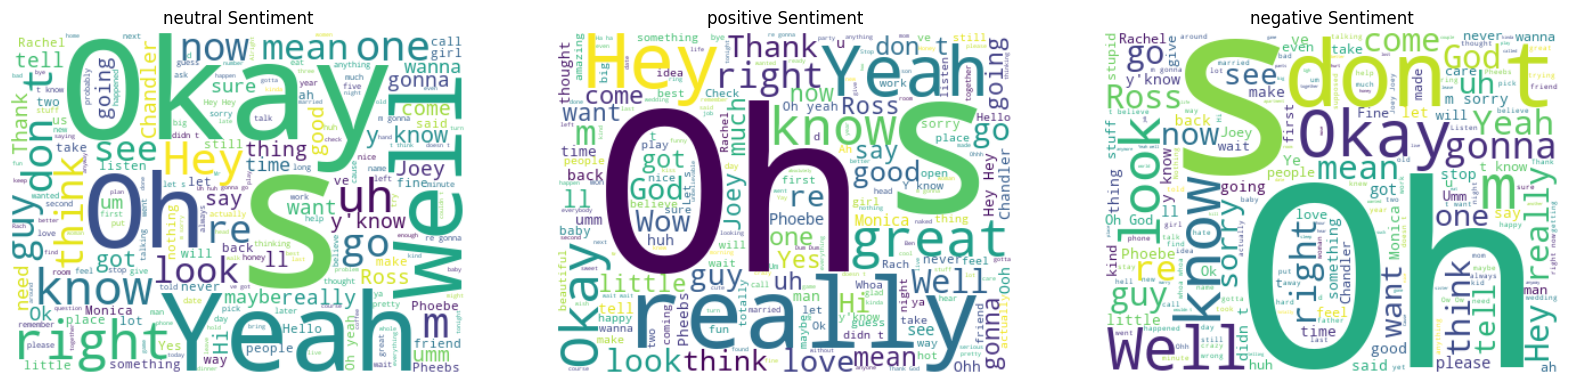

In [95]:
generate_word_clouds(train_df_top_10, 'Sentiment')

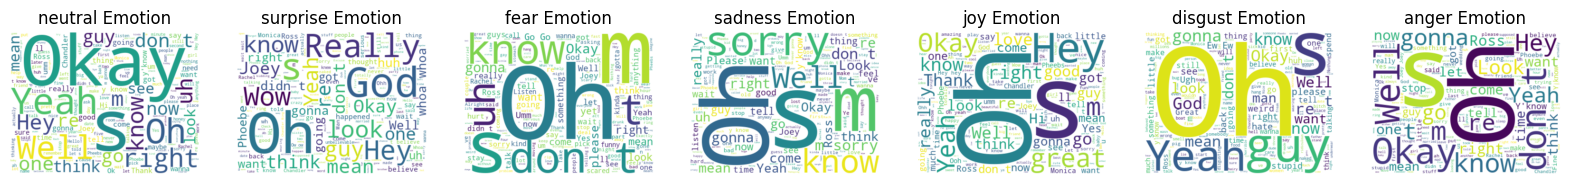

In [96]:
generate_word_clouds(train_df_top_10, 'Emotion')

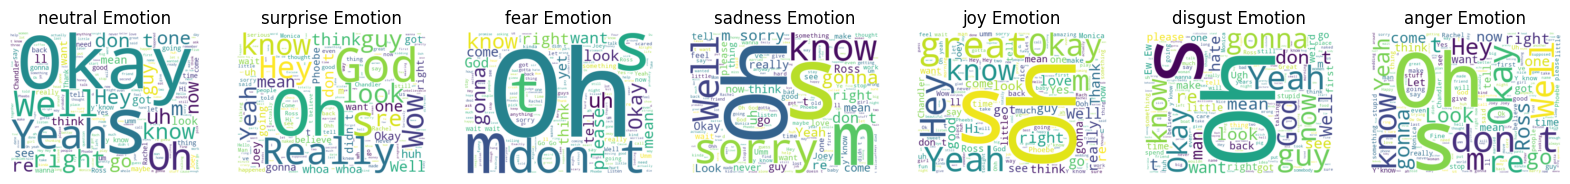

In [97]:
generate_word_clouds(train_df, 'Emotion')


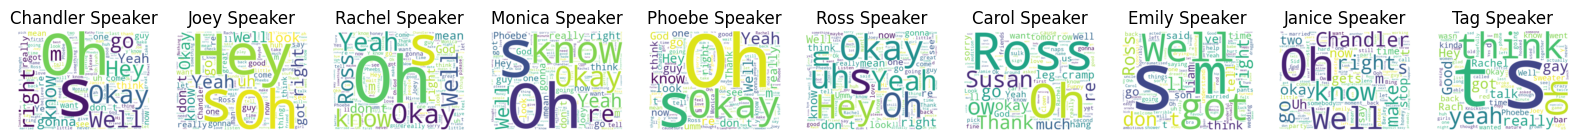

In [98]:
generate_word_clouds(train_df_top_10, 'Speaker')